In [1]:
# Loading all necessary packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the data
data = pd.read_csv('wdbc.data', header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
# Naming the columns
column_labels = ['patient_id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error',
'fractal dimension error', 'worst radius', 'worst texture',
'worst perimeter', 'worst area', 'worst smoothness',
'worst compactness', 'worst concavity', 'worst concave points',
'worst symmetry', 'worst fractal dimension']
data.columns = column_labels
data.head(3)

,patient_id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
# changing the 'M' and 'B' labels to full names so it's easier to read.
data['diagnosis'].replace('B', 'Benign', inplace=True)
data['diagnosis'].replace('M', 'Malignant', inplace=True)
data.head(3)

,patient_id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,Malignant,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,Malignant,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,Malignant,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [5]:
# Checking if 'M' and 'B' have been replaced along with the count
data.diagnosis.value_counts()

Benign       357
Malignant    212
Name: diagnosis, dtype: int64

In [6]:
# checking the null values in all the columns
data.isnull().sum()

patient_id                 0
diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [7]:
# Saving Features and Labels separately
feature_df = data.iloc[:, 2:]
label_df = data.iloc[:, 1]
feature_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [8]:
label_df.head(3)

0    Malignant
1    Malignant
2    Malignant
Name: diagnosis, dtype: object

In [9]:
# Standarising the data to bring all the columns on the same scale
x = StandardScaler().fit_transform(feature_df)  # normalize data
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [10]:
 # mean and stand deviation of normalized data
np.mean(x), np.std(x) 

(1.2487570048507913e-18, 1.0)

In [11]:
# Find first two normalised components for visualizetion
from sklearn.decomposition import PCA
pca_breast=PCA(n_components=2)
principalComponents_breast=pca_breast.fit_transform(x)
principal_breast_df=pd.DataFrame(data=principalComponents_breast, columns=['pc_1', 'pc_2'])
principal_breast_df.head(3)

,pc_1,pc_2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174


In [12]:
# variance explained by the first two components
pca_breast.explained_variance_ratio_ 

array([0.44272026, 0.18971182])

<Figure size 432x288 with 0 Axes>

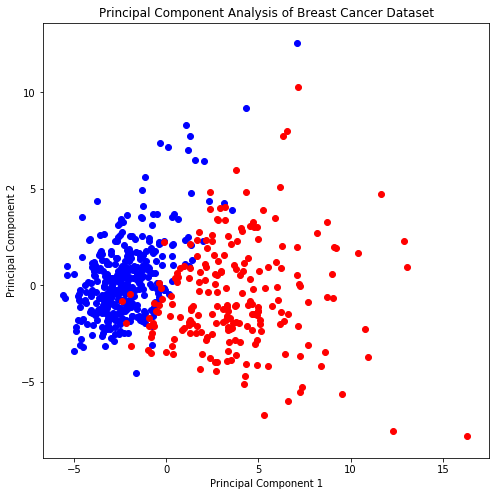

In [13]:
# Plot the data on first two principal components to see visually how clear is the separation of target variable
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.figure(figsize=(8,8))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Principal Component Analysis of Breast Cancer Dataset")
targets = ['Benign', 'Malignant']
colors = ['b', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = label_df == target
    plt.scatter(principal_breast_df.loc[indicesToKeep, 'pc_1'],
                principal_breast_df.loc[indicesToKeep, 'pc_2'],
                c=color)

From the above graph, it is clear that two principal components are able to separate the data very well. We can see a very clear separation of the data. 

In [14]:
 #Number of components
pca = PCA().fit(x)
#variance explained by each principal component
evr = pca.explained_variance_ratio_ 
print('\n'.join('{:2d}: {:0.4f}'.format(*k) for k in enumerate(evr)))

 0: 0.4427
 1: 0.1897
 2: 0.0939
 3: 0.0660
 4: 0.0550
 5: 0.0402
 6: 0.0225
 7: 0.0159
 8: 0.0139
 9: 0.0117
10: 0.0098
11: 0.0087
12: 0.0080
13: 0.0052
14: 0.0031
15: 0.0027
16: 0.0020
17: 0.0018
18: 0.0016
19: 0.0010
20: 0.0010
21: 0.0009
22: 0.0008
23: 0.0006
24: 0.0005
25: 0.0003
26: 0.0002
27: 0.0001
28: 0.0000
29: 0.0000


Text(0.5, 0, 'Number of components')

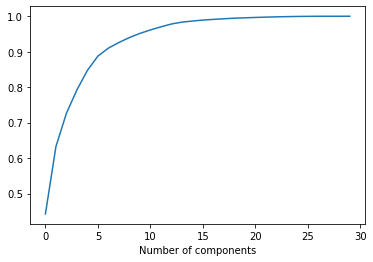

In [15]:
# Ploting the variance explained with number of Principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')

From the above graph, we see that top 5 component are able to explain 90% of the variance. So even if we take just 5 Principal component then we would be able to retain most of the information. 